In [157]:
#import library we needed
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler
import ipywidgets as widgets
from IPython.display import display, clear_output

#Data Analayzing Procces

In [158]:
#make the csv file to dataframe and store it in variable called "data"
data = pd.read_csv("credit.csv")


In [159]:
#chechking dataset datatype
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Index             1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 86.1+ KB


In [160]:
#checking the value inside the data
data.head()

,Index,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,2,49,male,1,own,little,NaN,2096,12,education,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,4,53,male,2,free,little,little,4870,24,car,1


In [161]:
#we drop Index because we dont need it anymore
data = data.drop('Index', axis=1)

In [162]:
#check the data if there is a null value or not
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [163]:
#we drop the row if there is a null value
data = data.dropna()

In [179]:
#make sure the null value already gone
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,0,2,1,0,1,5951,48,5,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,1
7,35,1,3,2,0,1,6948,36,1,1
9,28,1,3,1,0,1,5234,30,1,1


In [165]:
#we prepare a variable for encoding
LE = LabelEncoder()

In [166]:
categorical_columns = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

mappings = {}

for column in categorical_columns:
    data[column] = LE.fit_transform(data[column].astype(str))
    mappings[column] = dict(zip(LE.classes_, LE.transform(LE.classes_)))

# Print the mappings
for column, mapping in mappings.items():
    print(f'Mappings for {column}:')
    for original, encoded in mapping.items():
        print(f'  {original}: {encoded}')

Mappings for Sex:
  female: 0
  male: 1
Mappings for Job:
  0: 0
  1: 1
  2: 2
  3: 3
Mappings for Housing:
  free: 0
  own: 1
  rent: 2
Mappings for Saving accounts:
  little: 0
  moderate: 1
  quite rich: 2
  rich: 3
Mappings for Checking account:
  little: 0
  moderate: 1
  rich: 2
Mappings for Purpose:
  business: 0
  car: 1
  domestic appliances: 2
  education: 3
  furniture/equipment: 4
  radio/TV: 5
  repairs: 6
  vacation/others: 7


In [180]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,0,2,1,0,1,5951,48,5,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,1
7,35,1,3,2,0,1,6948,36,1,1
9,28,1,3,1,0,1,5234,30,1,1


In [168]:
Y = data["Risk"]

In [169]:
Y.head()

1    1
3    1
4    1
7    1
9    1
Name: Risk, dtype: int64

In [170]:
X = data.drop('Risk',axis=1)

In [171]:
X.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,22,0,2,1,0,1,5951,48,5
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1
7,35,1,3,2,0,1,6948,36,1
9,28,1,3,1,0,1,5234,30,1


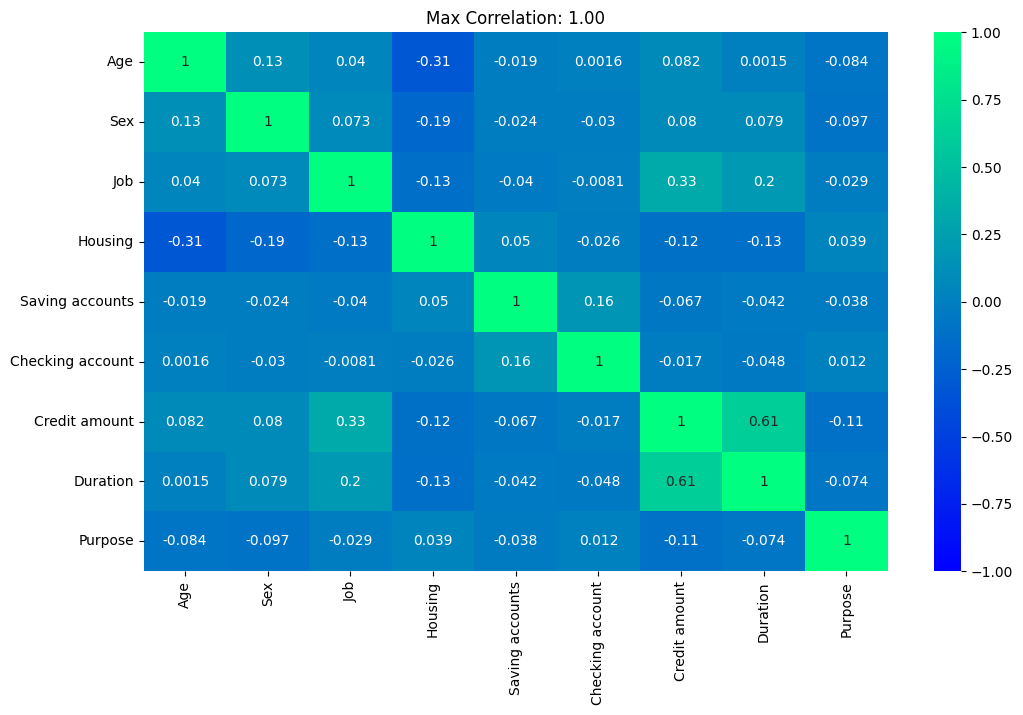

In [172]:
corr_matrix = X.corr()

# Find the maximum correlation value
max_corr = corr_matrix.stack().max()

# Create a heatmap with only the maximum correlation value
plt.figure(figsize=(7, 7))  # You can adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, vmax=max_corr, vmin=-max_corr, cmap='winter')
plt.title(f'Max Correlation: {max_corr:.2f}')
plt.show()

In [173]:
#scaler = StandardScaler()
#scaler = RobustScaler()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Text(0.5, 1.0, 'X After Scaling')

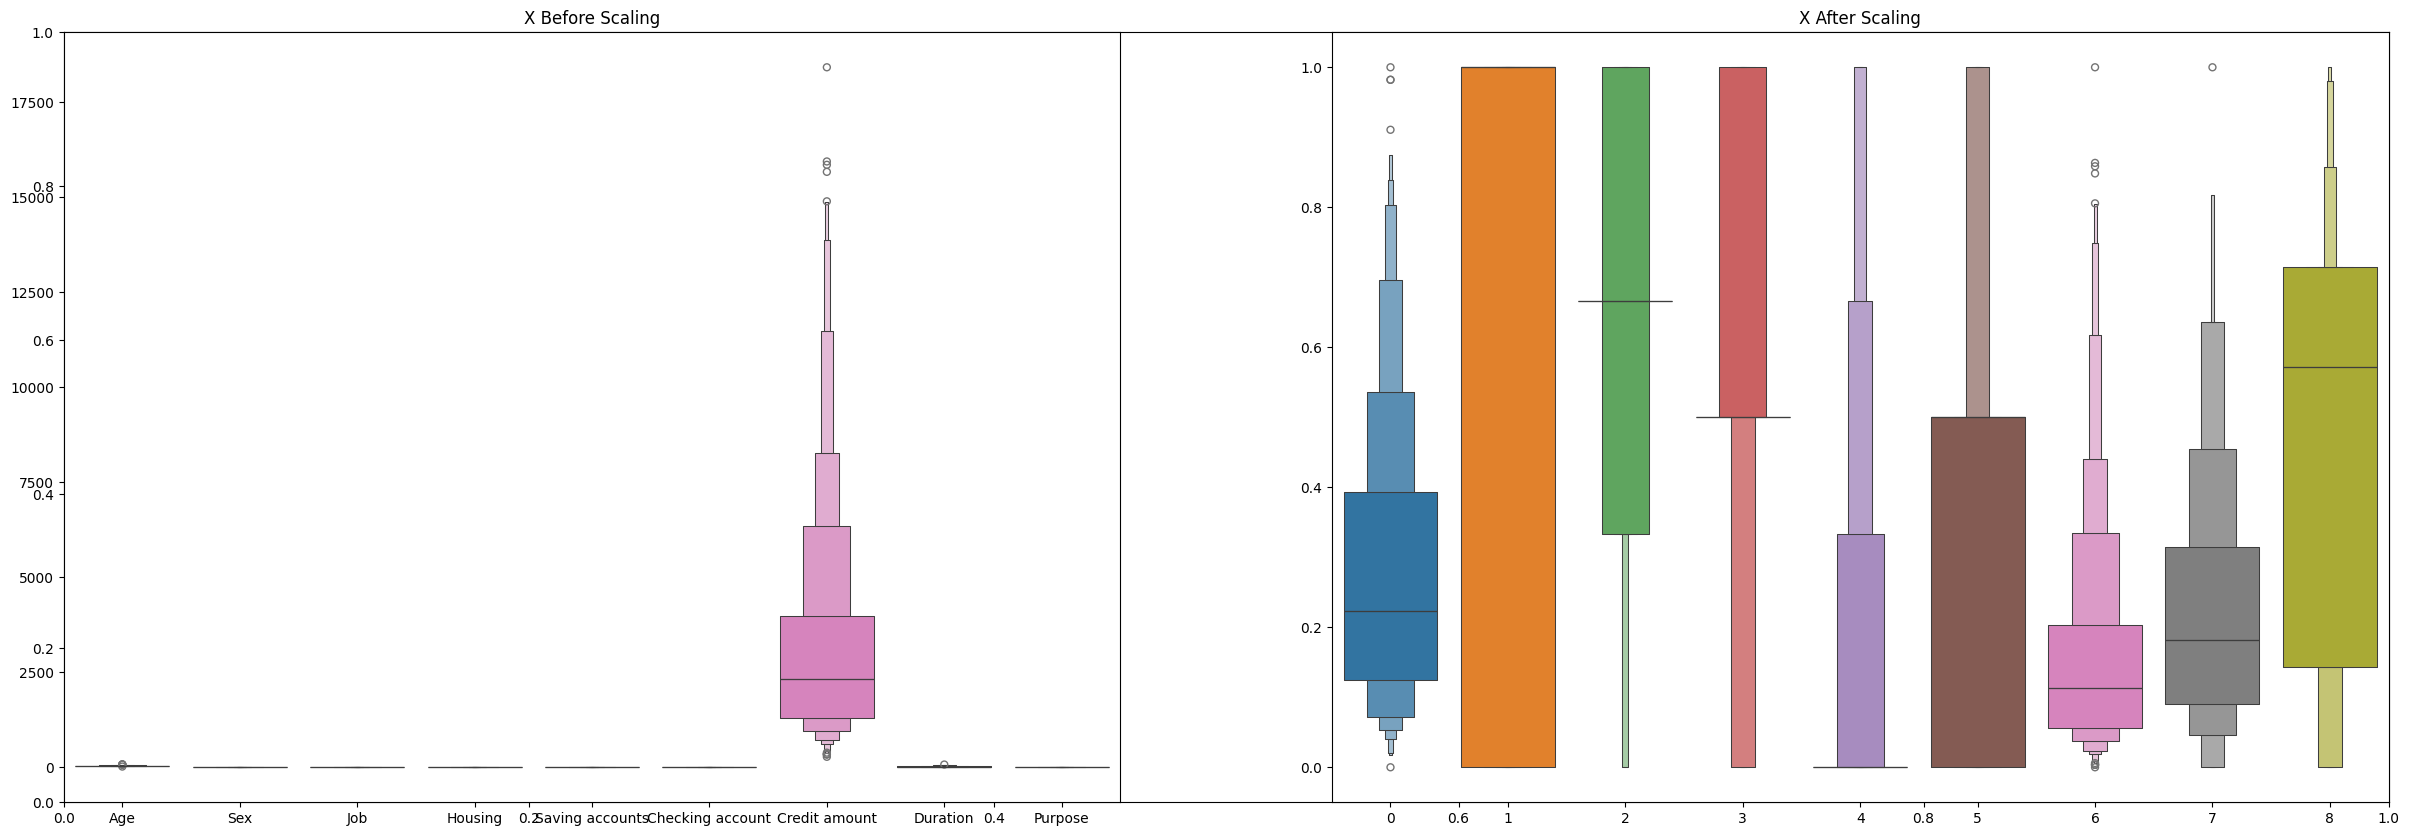

In [174]:
plt.subplots(figsize=(30, 10))
plt.subplot(1, 2, 1)
sns.boxenplot(data=X)
plt.title('X Before Scaling')
plt.subplot(1, 2, 2)
sns.boxenplot(data=X_scaled)
plt.title('X After Scaling')

In [175]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, train_size=0.8, random_state=42)

Fitting 5 folds for each of 54 candidates, totalling 270 fits

SVC:
Best parameters found: {'C': 0.1, 'kernel': 'linear'}
Best cross-validation score: 0.71
Accuracy: 0.7523809523809524
Confusion Matrix:
 [[ 0 26]
 [ 0 79]]
F1 Score: 0.8586956521739131
Precision: 0.7523809523809524
Recall: 1.0
True Negatives (TN): 0
False Positives (FP): 26
False Negatives (FN): 0
True Positives (TP): 79
ROC curve is not applicable for this model.
Fitting 5 folds for each of 3 candidates, totalling 15 fits

Logistic Regression:
Best parameters found: {'C': 10, 'penalty': 'l2'}
Best cross-validation score: 0.71
Accuracy: 0.7523809523809524
Confusion Matrix:
 [[ 0 26]
 [ 0 79]]
F1 Score: 0.8586956521739131
Precision: 0.7523809523809524
Recall: 1.0
True Negatives (TN): 0
False Positives (FP): 26
False Negatives (FN): 0
True Positives (TP): 79


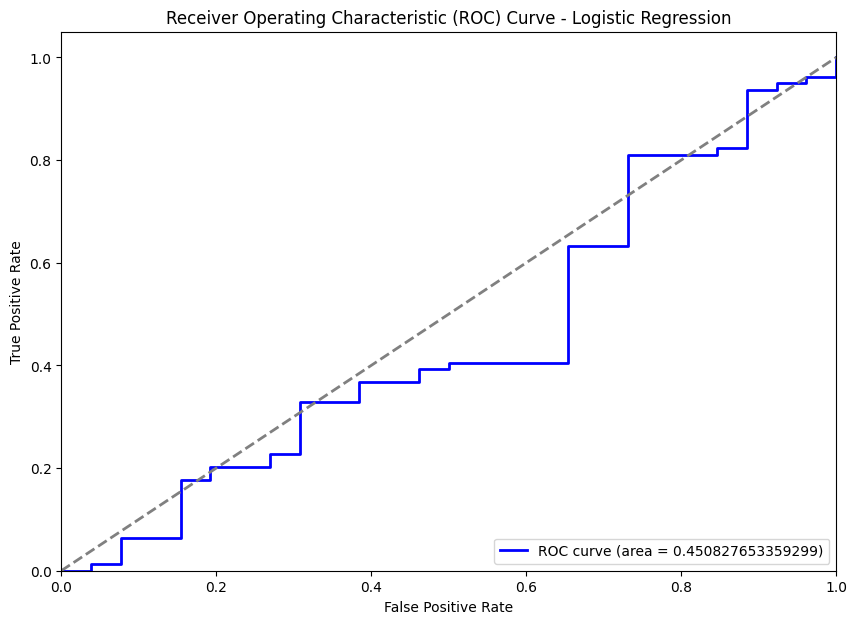

AUC Score: 0.450827653359299
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Decision Tree:
Best parameters found: {'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}
Best cross-validation score: 0.63
Accuracy: 0.7428571428571429
Confusion Matrix:
 [[ 1 25]
 [ 2 77]]
F1 Score: 0.850828729281768
Precision: 0.7549019607843137
Recall: 0.9746835443037974
True Negatives (TN): 1
False Positives (FP): 25
False Negatives (FN): 2
True Positives (TP): 77


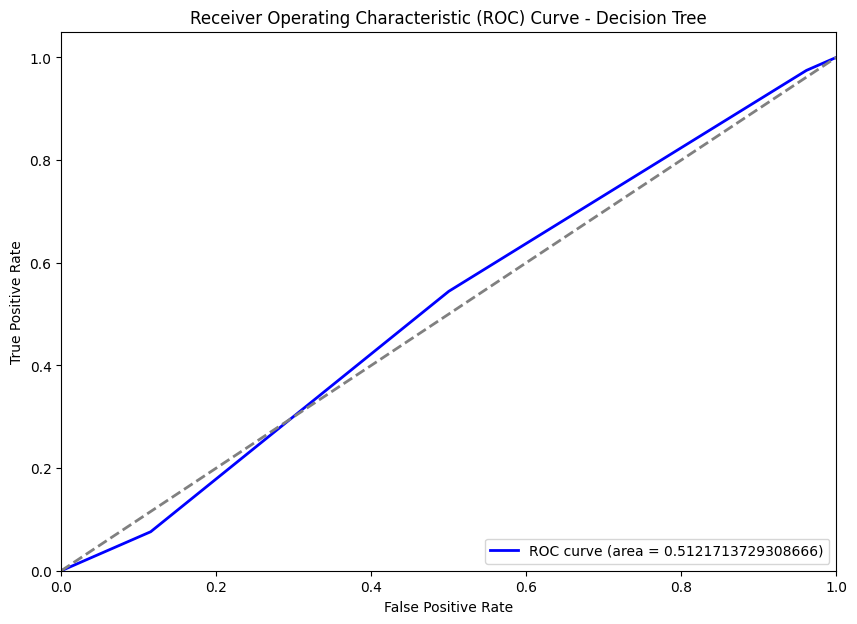

AUC Score: 0.5121713729308666
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Random Forest:
Best parameters found: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50}
Best cross-validation score: 0.67
Accuracy: 0.7333333333333333
Confusion Matrix:
 [[ 3 23]
 [ 5 74]]
F1 Score: 0.8409090909090909
Precision: 0.7628865979381443
Recall: 0.9367088607594937
True Negatives (TN): 3
False Positives (FP): 23
False Negatives (FN): 5
True Positives (TP): 74


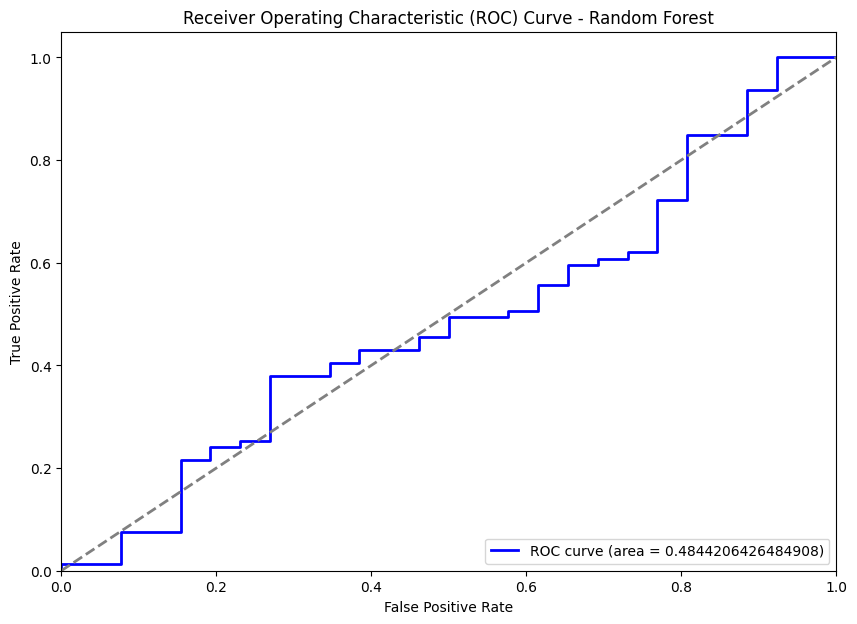

AUC Score: 0.4844206426484908


In [176]:
classifiers = {
    'SVC': (SVC(), [
        {'kernel': ['linear'], 'C': [0.1, 1, 10]},
        {'kernel': ['poly'], 'C': [0.1, 1, 10], 'degree': [2, 3, 4], 'coef0': [0, 0.1, 1, 10]},
        {'kernel': ['rbf'], 'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 'scale', 'auto']}
    ]),
    'Logistic Regression': (LogisticRegression(max_iter=1000), [
        {'C': [0.1, 1, 10], 'penalty': ['l2']}
    ]),
    'Decision Tree': (DecisionTreeClassifier(), [
        {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [None, 10, 20, 30, 40, 50]}
    ]),
    'Random Forest': (RandomForestClassifier(), [
        {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'criterion': ['gini', 'entropy']}
    ])
}

# Function to evaluate model performance
def evaluate_model(name, model, param_grid, X_train, Y_train, X_test, Y_test):
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, Y_train)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    Y_pred = grid_search.predict(X_test)
    
    accuracy = accuracy_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    
    # Print results
    print(f"\n{name}:")
    print(f"Best parameters found: {best_params}")
    print(f"Best cross-validation score: {best_score:.2f}")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n {conf_matrix}")
    print(f"F1 Score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    
    tn, fp, fn, tp = conf_matrix.ravel()
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")
    print(f"True Positives (TP): {tp}")
    
    # ROC curve
    if hasattr(grid_search, 'predict_proba'):
        Y_prob = grid_search.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(Y_test, Y_prob)
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc})')
        plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) Curve - {name}')
        plt.legend(loc="lower right")
        plt.show()
        
        print(f"AUC Score: {roc_auc}")
    else:
        print("ROC curve is not applicable for this model.")

# Evaluate all classifiers
for name, (model, param_grid) in classifiers.items():
    evaluate_model(name, model, param_grid, X_train, Y_train, X_test, Y_test)

In [177]:
# Define widget elements for user input
#```
#sex = widgets.Dropdown(options=[(label, idx) for label, idx in mappings['Sex'].items()], description='Sex:')
#job = widgets.IntSlider(value=0, min=0, max=3, step=1, description='Job:')
#housing = widgets.Dropdown(options=[(label, idx) for label, idx in mappings['Housing'].items()], description='Housing:')
#saving_accounts = widgets.Dropdown(options=[(label, idx) for label, idx in mappings['Saving accounts'].items()], description='Saving Accounts:')
#checking_account = widgets.Dropdown(options=[(label, idx) for label, idx in mappings['Checking account'].items()], description='Checking Account:')
#purpose = widgets.Dropdown(options=[(label, idx) for label, idx in mappings['Purpose'].items()], description='Purpose:')
#credit_amount = widgets.FloatText(description='Credit Amount:')
#duration = widgets.IntText(description='Duration:')
#age = widgets.IntText(description='Age:')
#ubmit_button = widgets.Button(description='Predict')

# Display the widgets
#input_widgets = widgets.VBox([
    #sex, job, housing, saving_accounts, checking_account, purpose, credit_amount, duration, age, submit_button
#])
#display(input_widgets)

# Function to handle prediction
#def predict_risk(button):
    #user_data = pd.DataFrame({
        #'Sex': [sex.value],
        #'Job': [job.value],
        #'Housing': [housing.value],
        #'Saving accounts': [saving_accounts.value],
        #'Checking account': [checking_account.value],
        #'Purpose': [purpose.value],
        #'Credit amount': [credit_amount.value],
        #'Duration': [duration.value],
        #'Age': [age.value]
    #})
    
    # Ensure the columns are in the correct order
    #user_data = user_data[['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Credit amount', 'Duration', 'Age']]

    # Transform the data
    #user_data_scaled = scaler.transform(user_data)
    
    # Predict with the best model from grid search
    #prediction = grid_search.predict(user_data_scaled)
    #result = 'Good' if prediction[0] == 1 else 'Bad'

    #with output:
        #clear_output()
        #print(f"Predicted Risk: {result}")

# Attach the function to the button click event
#output = widgets.Output()
#submit_button.on_click(predict_risk)

# Display the output widget
#display(output)

